<a href="https://colab.research.google.com/github/HimalKarkal/NFL/blob/Plays-Analysis/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, I will use the dataframe of features selected to train a Machine Learning model to classify positiveTackle and also get the probability of each prediction.

# Importing data

In [1]:
import pandas as pd

x = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
x.head()

,Unnamed: 0,gameId,quarter,gameClock,down,club,distance_to_ball_carrier,distance_to_closest_tackler,defender_x,defender_y,defender_momentum,ball_carrier_momentum,tackler_momentum,tackle
0,0,2022090800,1,14.48,2,LA,13.936603,2.376973,71.72,23.19,162.8,425.5335,151.2680,0
1,1,2022090800,1,14.48,2,LA,13.689156,2.833884,71.66,23.36,195.8,466.4709,106.1785,0
2,2,2022090800,1,14.48,2,LA,13.413624,3.261196,71.61,23.56,233.2,496.6353,91.6335,0
3,3,2022090800,1,14.48,2,LA,13.129680,3.686652,71.58,23.80,276.1,532.1862,77.3323,0
4,4,2022090800,1,14.48,2,LA,12.799910,4.079620,71.56,24.14,356.4,564.5052,96.3006,0


In [2]:
data = x.copy()

In [3]:
# Checking out data
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,gameId,quarter,gameClock,down,club,distance_to_ball_carrier,distance_to_closest_tackler,defender_x,defender_y,defender_momentum,ball_carrier_momentum,tackler_momentum,tackle
0,2022090800,1,14.48,2,LA,13.936603,2.376973,71.72,23.19,162.8,425.5335,151.2680,0
1,2022090800,1,14.48,2,LA,13.689156,2.833884,71.66,23.36,195.8,466.4709,106.1785,0
2,2022090800,1,14.48,2,LA,13.413624,3.261196,71.61,23.56,233.2,496.6353,91.6335,0
3,2022090800,1,14.48,2,LA,13.129680,3.686652,71.58,23.80,276.1,532.1862,77.3323,0
4,2022090800,1,14.48,2,LA,12.799910,4.079620,71.56,24.14,356.4,564.5052,96.3006,0


# Using Pycaret to determine the best model

In [4]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 75.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 66.6

In [5]:
from pycaret.classification import *

In [18]:
exp = setup(data.drop(['gameId', 'quarter',	'gameClock',	'down',	'club', 'tackler_momentum'], axis = 1).sample(frac=0.1, replace = False, random_state=42), target = 'tackle', session_id=42)

,Description,Value
0,Session id,42
1,Target,tackle
2,Target type,Binary
3,Original data shape,"(405230, 7)"
4,Transformed data shape,"(405230, 7)"
5,Transformed train set shape,"(283661, 7)"
6,Transformed test set shape,"(121569, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [19]:
compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:38:14
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9367,0.7780,0.0711,0.7837,0.1303,0.1206,0.2241,7.0100
rf,Random Forest Classifier,0.9352,0.7614,0.0668,0.6354,0.1209,0.1096,0.1915,27.4170
xgboost,Extreme Gradient Boosting,0.9344,0.7541,0.0602,0.5846,0.1091,0.0979,0.1725,1.1070
gbc,Gradient Boosting Classifier,0.9343,0.7310,0.0563,0.5817,0.1025,0.0919,0.1661,17.8510
ada,Ada Boost Classifier,0.9337,0.7155,0.0272,0.5755,0.0518,0.0461,0.1141,3.6120
lr,Logistic Regression,0.9333,0.6780,0.0045,0.5494,0.0089,0.0078,0.0451,0.9060
ridge,Ridge Classifier,0.9333,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0540
lda,Linear Discriminant Analysis,0.9333,0.6735,0.0014,0.6321,0.0027,0.0025,0.0265,0.0740
nb,Naive Bayes,0.9332,0.6342,0.0032,0.4113,0.0064,0.0054,0.0314,0.0660
svm,SVM - Linear Kernel,0.9316,0.0000,0.0079,0.2189,0.0143,0.0095,0.0233,4.3140


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [20]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9372,0.7833,0.0792,0.7937,0.1441,0.1336,0.2386
1,0.9361,0.7687,0.0713,0.7143,0.1297,0.1190,0.2125
2,0.9359,0.7668,0.0608,0.7468,0.1124,0.1034,0.2013
3,0.9366,0.7782,0.0681,0.7866,0.1254,0.1160,0.2200
4,0.9364,0.7807,0.0681,0.7588,0.1251,0.1153,0.2153
5,0.9365,0.7807,0.0703,0.7600,0.1286,0.1187,0.2189
6,0.9372,0.7815,0.0750,0.8304,0.1376,0.1280,0.2383
7,0.9370,0.7884,0.0692,0.8397,0.1279,0.1189,0.2303
8,0.9372,0.7710,0.0787,0.8011,0.1433,0.1330,0.2391


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [21]:
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Model Building


Training Extra Trees Classifier on the entire data

In [23]:
# Importing necessary packages

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score

In [24]:
# Splitting data

X = data[['defender_x','defender_y','distance_to_ball_carrier', 'distance_to_closest_tackler', 'defender_momentum', 'ball_carrier_momentum', 'tackler_momentum']]
y = data['tackle']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Training data

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [26]:
# Making predictions

y_pred = etc.predict(X_test)

In [28]:
# Model Evaluation

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Precision Score:', precision_score(y_test, y_pred, average = 'weighted'))
print('Recall Score:', recall_score(y_test, y_pred, average = 'weighted'))
print('F1 Score:', f1_score(y_test, y_pred, average = 'weighted'))
print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_pred))


Accuracy Score: 0.9481653034507521
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97    756205
           1       0.96      0.23      0.38     54256

    accuracy                           0.95    810461
   macro avg       0.96      0.62      0.68    810461
weighted avg       0.95      0.95      0.93    810461

Precision Score: 0.9490030086080926
Recall Score: 0.9481653034507521
F1 Score: 0.9330664589296226
Cohen Kappa Score: 0.36033307754652355


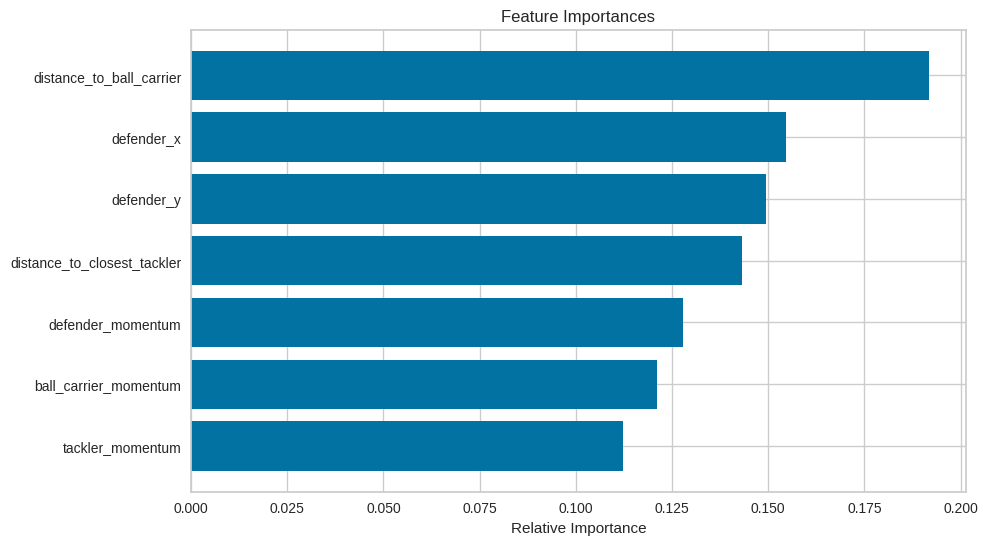

In [29]:
# Graphing feature importances

import numpy as np
import matplotlib.pyplot as plt
importances = etc.feature_importances_
features = X.columns
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

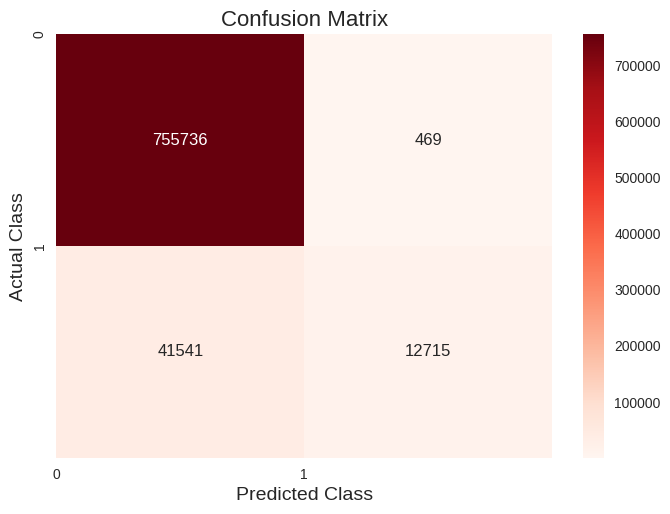

In [30]:
# Graphing the confusion matrix

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap="Reds", fmt="d")

# Add labels and title
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Class", fontsize=14)
plt.ylabel("Actual Class", fontsize=14)

# Set tick labels
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test))
plt.yticks(tick_marks, np.unique(y_test))

# Show the plot
plt.show()


In [31]:
!pip install joblib

In [33]:
ref_cols = list(X.columns)
target_cols = 'tackle'

import joblib
joblib.dump(value = [etc, ref_cols, target_cols], filename =  '/content/drive/MyDrive/Colab Notebooks/etc_model.pkl')

['/content/drive/MyDrive/Colab Notebooks/etc_model.pkl']